# Final big data project

- Olivier Robert 
- Rémi Perrichon 
- Cyprien Cambus 
- Baptiste Hessel

## Introduction 
This project is divded into 2 notebooks. This first notebook was written in Databricks (community edition) and uses PySpark. 
The goal of our project is to predict the genre of music tracks. By genre, we mean the musical style : rock, blues, jazz etc. 
To achieve this goal, we are going to use 4 datasets. Each track is uniquely identified by an identification number called "track_id".   


- The "tracks" dataset contains usual details about the track: the date, the producer, the duration etc. 
- The "features" dataset contains interpretable features (tempo, danceability of the track etc.) as well as temporal features (energy of signal, zero crossing rate, maximum amplitude, minimum energy etc.). The latter are not easily interpretable for non-physicists like us. 
- The "echonest" dataset contains additional features 
- The "genre" dataset is a lookup table where each genre (rock, blues, jazz ...) is associated to a code (1, 2 ...)

In what follows, we are going to perform the following things : 
- Importing the data (not as easy as it seems !)
- Some descriptive statistics and "pretty plots" to gain some intuition 
- Two PCAs (one of which is done with MLlib) to reduce the number of features 
- A logistic regression to classify the top 4 genres 
- A tree to classify the top 4 genres 
- A tree (with GridSearch) to classify the top 4 genres 
- A random forest (with GridSearch) to classify the top 4 genres 

The second notebook uses TensorFlow and should be opened with Colab.

We start by installing mlflow (needed later)

In [0]:
%pip install mlflow

Python interpreter will be restarted.
Collecting mlflow
 Using cached mlflow-1.15.0-py3-none-any.whl (14.2 MB)
Collecting pyyaml
 Using cached PyYAML-5.4.1-cp38-cp38-manylinux1_x86_64.whl (662 kB)
Collecting Flask
 Using cached Flask-1.1.2-py2.py3-none-any.whl (94 kB)
Processing /root/.cache/pip/wheels/12/1a/8d/0c016e06370d07f82def661b6cb7d91d4e6b4ff7f2982e9f2c/prometheus_flask_exporter-0.18.1-py3-none-any.whl
Requirement already satisfied: pytz in /databricks/python3/lib/python3.8/site-packages (from mlflow) (2020.5)
Collecting docker>=4.0.0
 Using cached docker-5.0.0-py2.py3-none-any.whl (146 kB)
Collecting gitpython>=2.1.0
 Using cached GitPython-3.1.14-py3-none-any.whl (159 kB)
Processing /root/.cache/pip/wheels/9d/de/6d/ca8d461ec29e010b1267d7353d0b058819770f7680bb9360e4/alembic-1.4.1-py2.py3-none-any.whl
Processing /root/.cache/pip/wheels/e9/f3/dc/eeff77dbc147629fa716741fc216520abbc0e15ce4b876706f/databricks_cli-0.14.3-py3-none-any.whl
Requirement already satisfied: entrypoints in /databricks/python3/lib/python3.8/site-packages (from mlflow) (0.3)
Collecting cloudpickle
 Using cached cloudpickle-1.6.0-py3-none-any.whl (23 kB)
Collecting protobuf>=3.6.0
 Using cached protobuf-3.15.8-cp38-cp38-manylinux1_x86_64.whl (1.0 MB)
Processing /root/.cache/pip/wheels/21/4b/32/9be8daf8a4d73da26e4dba66c47c9b4b7d838a6b372981a3ed/gunicorn-20.1.0-py3-none-any.whl
Collecting querystring-parser
 Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
Requirement already satisfied: pandas in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.1.3)
Collecting sqlparse>=0.3.1
 Using cached sqlparse-0.4.1-py3-none-any.whl (42 kB)
Requirement already satisfied: requests>=2.17.3 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (2.24.0)
Collecting click>=7.0
 Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.19.2)
Collecting sqlalchemy
 Using cached SQLAlchemy-1.4.9-cp38-cp38-manylinux2014_x86_64.whl (1.5 MB)
Collecting Werkzeug>=0.15
 Using cached Werkzeug-1.0.1-py2.py3-none-any.whl (298 kB)
Collecting Jinja2>=2.10.1
 Using cached Jinja2-2.11.3-py2.py3-none-any.whl (125 kB)
Collecting itsdangerous>=0.24
 Using cached itsdangerous-1.1.0-py2.py3-none-any.whl (16 kB)
Collecting prometheus-client
 Using cached prometheus_client-0.10.1-py2.py3-none-any.whl (55 kB)
Collecting websocket-client>=0.32.0
 Using cached websocket_client-0.58.0-py2.py3-none-any.whl (61 kB)
Collecting gitdb<5,>=4.0.1
 Using cached gitdb-4.0.7-py3-none-any.whl (63 kB)
Requirement already satisfied: python-dateutil in /databricks/python3/lib/python3.8/site-packages (from alembic<=1.4.1->mlflow) (2.8.1)
Collecting python-editor>=0.3
 Using cached python_editor-1.0.4-py3-none-any.whl (4.9 kB)
Collecting Mako
 Using cached Mako-1.1.4-py2.py3-none-any.whl (75 kB)
Requirement already satisfied: six>=1.10.0 in /usr/local/lib/python3.8/site-packages (from databricks-cli>=0.8.7->mlflow) (1.15.0)
Collecting tabulate>=0.7.7
 Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
Requirement already satisfied: setuptools>=3.0 in /databricks/python3/lib/python3.8/site-packages (from gunicorn; platform_system != "Windows"->mlflow) (50.3.1)
Requirement already satisfied: chardet<4,>=3.0.2 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (3.0.4)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (1.25.11)
Requirement already satisfied: idna<3,>=2.5 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (2.10)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (2020.12.5)
Collecting greenlet!=0.4.17; python_version >= "3"
 Using cached greenlet-1.0.0-cp38-cp38-manylinux2010_x86_64.whl (165 kB)
Collecting M

In [0]:
#Usual packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats as st

from pyspark.sql.functions import col
from pyspark.sql.types import DateType
from pyspark.sql.functions import year

## Import data

There are 4 files to import : 
- The tracks dataset 
- The features dataset 
- The genres dataset 
- The echonest

All csv files has been uploaded as tables in FileStore. Let's check we have them:

In [0]:
%fs
ls dbfs:/FileStore/tables/

path,name,size
dbfs:/FileStore/tables/Final_project_big_data_2.ipynb,Final_project_big_data_2.ipynb,695845
dbfs:/FileStore/tables/donations-1.csv,donations-1.csv,52482
dbfs:/FileStore/tables/donations-2.csv,donations-2.csv,52482
dbfs:/FileStore/tables/donations.csv,donations.csv,52482
dbfs:/FileStore/tables/features.csv,features.csv,951106967
dbfs:/FileStore/tables/genres.csv,genres.csv,3922
dbfs:/FileStore/tables/spark_echonest.csv,spark_echonest.csv,45462893
dbfs:/FileStore/tables/spark_tracks.csv,spark_tracks.csv,261215591
dbfs:/FileStore/tables/users.csv,users.csv,4256
dbfs:/FileStore/tables/users__1_-1.csv,users__1_-1.csv,4256


The following line is usefull if you want to remove a table (do not uncomment)

In [0]:
#Remove from dbfs
#dbutils.fs.rm("/FileStore/tables/spark_tracks.csv")

In [0]:
#Clear cache 
spark.catalog.clearCache()

### The tracks dataset

The tracks dataset is a nightmare to open with PySpark because variables are not stored correctly. We need to open this one with pandas. Don't worry, we will open the rest with PySpark 
We need to change the location of the tracks file to open it up with pandas on Databricks ...

In [0]:
%fs cp dbfs:/FileStore/tables/spark_tracks.csv file:/tmp/spark_tracks.csv

res1: Boolean = true

In [0]:
tracks_pandas = pd.read_csv("file:/tmp/spark_tracks.csv",) 

In [0]:
#We convert to a PySpark DataFrame 
df_tracks = spark.createDataFrame(tracks_pandas) 
df_tracks = df_tracks.drop("Unnamed: 0")

#Let's see the first columns 
df_tracks.select(df_tracks.columns[:7]).show()

+--------+--------+-------------------+-------------------+--------+---------+---+
track_id|comments| date_created| date_released|engineer|favorites| id|
+--------+--------+-------------------+-------------------+--------+---------+---+
 2| 0|2008-11-26 01:44:45|2009-01-05 00:00:00| null| 4| 1|
 3| 0|2008-11-26 01:44:45|2009-01-05 00:00:00| null| 4| 1|
 5| 0|2008-11-26 01:44:45|2009-01-05 00:00:00| null| 4| 1|
 10| 0|2008-11-26 01:45:08|2008-02-06 00:00:00| null| 4| 6|
 20| 0|2008-11-26 01:45:05|2009-01-06 00:00:00| null| 2| 4|
 26| 0|2008-11-26 01:45:05|2009-01-06 00:00:00| null| 2| 4|
 30| 0|2008-11-26 01:45:05|2009-01-06 00:00:00| null| 2| 4|
 46| 0|2008-11-26 01:45:05|2009-01-06 00:00:00| null| 2| 4|
 48| 0|2008-11-26 01:45:05|2009-01-06 00:00:00| null| 2| 4|
 134| 0|2008-11-26 01:44:45|2009-01-05 00:00:00| null| 4| 1|
 135| 1|2008-11-26 01:49:19|2009-01-07 00:00:00| null| 0| 58|
 136| 1|2008-11-26 01:49:19|2009-01-07 00:00:00| null| 0| 58|
 137| 1|2008-11-26 01:49:35|2006-12-01 00:00:00| null| 2| 59|
 138| 1|2008-11-26 01:49:35|2006-12-01 00:00:00| null| 2| 59|
 139| 0|2008-11-26 01:49:57|2009-01-16 00:00:00| null| 1| 60|
 140| 1|2008-11-26 01:49:59|2007-05-22 00:00:00| null| 1| 61|
 141| 0|2008-11-26 01:49:57|2009-01-16 00:00:00| null| 1| 60|
 142| 0|2008-11-26 01:50:03|2005-01-25 00:00:00| null| 1| 62|
 144| 0|2008-11-26 01:50:07|2009-01-06 00:00:00| null| 0| 64|
 145| 0|2008-11-26 01:50:07|2009-01-06 00:00:00| null| 0| 64|
+--------+--------+-------------------+-------------------+--------+---------+---+
only showing top 20 rows

In [0]:
#Number of rows and number of columns in the dataset
print("There are {} rows and {} columns in the tracks dataset".format(df_tracks.count(), len(df_tracks.columns)))

There are 106574 rows and 53 columns in the tracks dataset

In [0]:
#Get the columns names of the tracks dataset 
df_tracks.columns

Out[7]: ['track_id',
 'comments',
 'date_created',
 'date_released',
 'engineer',
 'favorites',
 'id',
 'information',
 'listens',
 'producer',
 'tags',
 'title',
 'tracks',
 'type',
 'active_year_begin',
 'active_year_end',
 'associated_labels',
 'bio',
 'comments.1',
 'date_created.1',
 'favorites.1',
 'id.1',
 'latitude',
 'location',
 'longitude',
 'members',
 'name',
 'related_projects',
 'tags.1',
 'website',
 'wikipedia_page',
 'split',
 'subset',
 'bit_rate',
 'comments.2',
 'composer',
 'date_created.2',
 'date_recorded',
 'duration',
 'favorites.2',
 'genre_top',
 'genres',
 'genres_all',
 'information.1',
 'interest',
 'language_code',
 'license',
 'listens.1',
 'lyricist',
 'number',
 'publisher',
 'tags.2',
 'title.1']

In [0]:
#Let me recall the types available in PySpark
#We want the date to be a date ... 
from pyspark.sql import types 

for t in ['BinaryType', 'BooleanType', 'ByteType', 'DateType', 
          'DecimalType', 'DoubleType', 'FloatType', 'IntegerType', 
           'LongType', 'ShortType', 'StringType', 'TimestampType']:
    print(f"{t}: {getattr(types, t)().simpleString()}")
    
df_tracks = df_tracks.withColumn("date_created", df_tracks.date_created.cast('date'))
df_tracks = df_tracks.withColumn("date_released", df_tracks.date_created.cast('date'))

BinaryType: binary
BooleanType: boolean
ByteType: tinyint
DateType: date
DecimalType: decimal(10,0)
DoubleType: double
FloatType: float
IntegerType: int
LongType: bigint
ShortType: smallint
StringType: string
TimestampType: timestamp

### The features dataset

In [0]:
# File location and type
file_location = "/FileStore/tables/features.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "false"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df_features = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

#We check all run ok 
df_features.select(df_features.columns[:5]).show()

+---+---------------+---------------+--------------+---------------+
_c0| _c1| _c2| _c3| _c4|
+---+---------------+---------------+--------------+---------------+
 2| 7.1806526184| 5.2303090096| 0.24932080507| 1.3476201296|
 3| 1.8889633417| 0.76053929329| 0.34529656172| 2.2952005863|
 5| 0.52756297588|-0.077654317021|-0.27961030602| 0.6858831048|
 10| 3.7022454739| -0.29119303823| 2.1967420578| -0.234449476|
 20| -0.19383698702| -0.19852678478| 0.20154602826| 0.25855624676|
 26| -0.69953453541| -0.68415790796|0.048824872822| 0.042658798397|
 30| -0.7214871645| -0.84855991602| 0.89090377092| 0.088619679213|
 46| -0.11970755458| -0.85881441832| 2.3625464439| 0.10658428818|
 48| -1.0540534258| 0.93233942986| 0.52806353569| -1.0353376865|
134| 0.91844475269| 0.67414724827| 0.5778182745| 1.2811170816|
135| 0.97840219736| 0.62357187271| 1.12926054| -1.0439702272|
136| 0.9150006175| -0.64347624779|-0.46050721407| -0.53070127964|
137| 1.6071908474| 1.1996492147| 0.74576503038| 1.4308350086|
138| 1.501403451| 0.95751410723| 1.2766846418| 0.64038944244|
139|-0.020868886262| 0.43232953548| 0.33127766848| 0.82984548807|
140| 0.53357946873| -0.62388461828| -1.0862048864| -1.0810792446|
141| 0.17289805412| -0.28480431437| -1.1696622372| -1.0628546476|
142| -0.58126991987| 3.1994838715| 1.298345685| -0.68125325441|
144| 0.12120676786|-0.025307545438| 0.54132652283| 0.96768683195|
145| 0.95405399799| 0.31532418728|0.015383350663|-0.023933362216|
+---+---------------+---------------+--------------+---------------+
only showing top 20 rows

In [0]:
#The first column is the id of the track : we rename it. 
#Other columns are features 
df_features_clean = df_features.withColumnRenamed("_c0", "track_id")
df_features_clean.select(df_features_clean.columns[:5]).show()

+--------+---------------+---------------+--------------+---------------+
track_id| _c1| _c2| _c3| _c4|
+--------+---------------+---------------+--------------+---------------+
 2| 7.1806526184| 5.2303090096| 0.24932080507| 1.3476201296|
 3| 1.8889633417| 0.76053929329| 0.34529656172| 2.2952005863|
 5| 0.52756297588|-0.077654317021|-0.27961030602| 0.6858831048|
 10| 3.7022454739| -0.29119303823| 2.1967420578| -0.234449476|
 20| -0.19383698702| -0.19852678478| 0.20154602826| 0.25855624676|
 26| -0.69953453541| -0.68415790796|0.048824872822| 0.042658798397|
 30| -0.7214871645| -0.84855991602| 0.89090377092| 0.088619679213|
 46| -0.11970755458| -0.85881441832| 2.3625464439| 0.10658428818|
 48| -1.0540534258| 0.93233942986| 0.52806353569| -1.0353376865|
 134| 0.91844475269| 0.67414724827| 0.5778182745| 1.2811170816|
 135| 0.97840219736| 0.62357187271| 1.12926054| -1.0439702272|
 136| 0.9150006175| -0.64347624779|-0.46050721407| -0.53070127964|
 137| 1.6071908474| 1.1996492147| 0.74576503038| 1.4308350086|
 138| 1.501403451| 0.95751410723| 1.2766846418| 0.64038944244|
 139|-0.020868886262| 0.43232953548| 0.33127766848| 0.82984548807|
 140| 0.53357946873| -0.62388461828| -1.0862048864| -1.0810792446|
 141| 0.17289805412| -0.28480431437| -1.1696622372| -1.0628546476|
 142| -0.58126991987| 3.1994838715| 1.298345685| -0.68125325441|
 144| 0.12120676786|-0.025307545438| 0.54132652283| 0.96768683195|
 145| 0.95405399799| 0.31532418728|0.015383350663|-0.023933362216|
+--------+---------------+---------------+--------------+---------------+
only showing top 20 rows

In [0]:
#Number of rows and number of columns in the dataset
print("There are {} rows and {} columns in the tracks dataset".format(df_features_clean.count(), len(df_features_clean.columns)))

There are 106574 rows and 519 columns in the tracks dataset

In [0]:
#Rename other columns 
old_names=list(df_features_clean.columns)
new_names_ft = ["track_id"]+['feature'+str(i) for i in range(len(df_features_clean.columns)-1)]

df_features_clean = df_features_clean.toDF(*new_names_ft)

df_features_clean.select(df_features_clean.columns[:5]).show()

+--------+---------------+---------------+--------------+---------------+
track_id| feature0| feature1| feature2| feature3|
+--------+---------------+---------------+--------------+---------------+
 2| 7.1806526184| 5.2303090096| 0.24932080507| 1.3476201296|
 3| 1.8889633417| 0.76053929329| 0.34529656172| 2.2952005863|
 5| 0.52756297588|-0.077654317021|-0.27961030602| 0.6858831048|
 10| 3.7022454739| -0.29119303823| 2.1967420578| -0.234449476|
 20| -0.19383698702| -0.19852678478| 0.20154602826| 0.25855624676|
 26| -0.69953453541| -0.68415790796|0.048824872822| 0.042658798397|
 30| -0.7214871645| -0.84855991602| 0.89090377092| 0.088619679213|
 46| -0.11970755458| -0.85881441832| 2.3625464439| 0.10658428818|
 48| -1.0540534258| 0.93233942986| 0.52806353569| -1.0353376865|
 134| 0.91844475269| 0.67414724827| 0.5778182745| 1.2811170816|
 135| 0.97840219736| 0.62357187271| 1.12926054| -1.0439702272|
 136| 0.9150006175| -0.64347624779|-0.46050721407| -0.53070127964|
 137| 1.6071908474| 1.1996492147| 0.74576503038| 1.4308350086|
 138| 1.501403451| 0.95751410723| 1.2766846418| 0.64038944244|
 139|-0.020868886262| 0.43232953548| 0.33127766848| 0.82984548807|
 140| 0.53357946873| -0.62388461828| -1.0862048864| -1.0810792446|
 141| 0.17289805412| -0.28480431437| -1.1696622372| -1.0628546476|
 142| -0.58126991987| 3.1994838715| 1.298345685| -0.68125325441|
 144| 0.12120676786|-0.025307545438| 0.54132652283| 0.96768683195|
 145| 0.95405399799| 0.31532418728|0.015383350663|-0.023933362216|
+--------+---------------+---------------+--------------+---------------+
only showing top 20 rows

### The genres dataset

In [0]:
# File location and type
file_location = "/FileStore/tables/genres.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df_genres = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

df_genres.show(5)

+--------+-------+------+-------------+---------+
genre_id|#tracks|parent| title|top_level|
+--------+-------+------+-------------+---------+
 1| 8693| 38| Avant-Garde| 38|
 2| 5271| 0|International| 2|
 3| 1752| 0| Blues| 3|
 4| 4126| 0| Jazz| 4|
 5| 4106| 0| Classical| 5|
+--------+-------+------+-------------+---------+
only showing top 5 rows

In [0]:
#Number of rows and number of columns in the dataset
print("There are {} rows and {} columns in the genres dataset".format(df_genres.count(), len(df_genres.columns)))

#Number of unique gender 
print("There are {} unique possible gender in the genres dataset".format(df_genres.select(df_genres.title).distinct().count()))

There are 163 rows and 5 columns in the genres dataset
There are 163 unique possible gender in the genres dataset

### The echonest dataset

In [0]:
# File location and type
file_location = "/FileStore/tables/spark_echonest.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df_echonest = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

df_echonest = df_echonest.drop("_c0")
df_echonest.select(df_echonest.columns[:5]).show(5)

+--------+------------+------------+------------------+--------------------+
track_id|acousticness|danceability| energy| instrumentalness|
+--------+------------+------------+------------------+--------------------+
 2|0.4166752327|0.6758939853| 0.6344762684|0.010628068300000001|
 3|0.3744077685|0.5286430621| 0.8174611317| 0.0018511032|
 5|0.0435668989|0.7455658702| 0.7014699916|6.967989999999999E-4|
 10|0.9516699648|0.6581786543|0.9245251615000001| 0.9654270154000001|
 134|0.4522173071|0.5132380502| 0.5604099311| 0.0194426943|
+--------+------------+------------+------------------+--------------------+
only showing top 5 rows

In [0]:
#Number of rows and number of columns in the dataset
print("There are {} rows and {} columns in the tracks dataset".format(df_echonest.count(), len(df_echonest.columns)))

There are 13129 rows and 250 columns in the tracks dataset

In [0]:
df_echonest.columns

Out[17]: ['track_id',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'tempo',
 'valence',
 'album_date',
 'album_name',
 'artist_latitude',
 'artist_location',
 'artist_longitude',
 'artist_name',
 'release',
 'artist_discovery_rank',
 'artist_familiarity_rank',
 'artist_hotttnesss_rank',
 'song_currency_rank',
 'song_hotttnesss_rank',
 'artist_discovery',
 'artist_familiarity',
 'artist_hotttnesss',
 'song_currency',
 'song_hotttnesss',
 '000',
 '001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '028',
 '029',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '037',
 '038',
 '039',
 '040',
 '041',
 '042',
 '043',
 '044',
 '045',
 '046',
 '047',
 '048',
 '049',
 '050',
 '051',
 '052',
 '053',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '060',
 '061',
 '062',
 '063',
 '064',
 '065',
 '066',
 '067',
 '068',
 '069',
 '070',
 '071',
 '072',
 '073',
 '074',
 '075',
 '076',
 '077',
 '078',
 '079',
 '080',
 '081',
 '082',
 '083',
 '084',
 '085',
 '086',
 '087',
 '088',
 '089',
 '090',
 '091',
 '092',
 '093',
 '094',
 '095',
 '096',
 '097',
 '098',
 '099',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '176',
 '177',
 '178',
 '179',
 '180',
 '181',
 '182',
 '183',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '190',
 '191',
 '192',
 '193',
 '194',
 '195',
 '196',
 '197',
 '198',
 '199',
 '200',
 '201',
 '202',
 '203',
 '204',
 '205',
 '206',
 '207',
 '208',
 '209',
 '210',
 '211',
 '212',
 '213',
 '214',
 '215',
 '216',
 '217',
 '218',
 '219',
 '220',
 '221',
 '222',
 '223']

## Building a global table

To build models, it's easier to work with a big table.

In [0]:
big_table_v1 = df_tracks.join(df_features_clean, on=['track_id'], how='left') 
big_table_final = big_table_v1.join(df_echonest, on=['track_id'], how='left')
print("There are {} rows and {} columns in the big_table_final dataset".format(big_table_final.count(), len(big_table_final.columns)))

There are 106574 rows and 820 columns in the big_table_final dataset

In [0]:
#All tracks do not have technical features (echonest). 
#We can build a small dataframe where we have all the features not missing 
big_table_final_complete = big_table_final.where(col("acousticness").isNotNull())

#We need the genre of the the tracks for the classification part. In this notebook, we only take the rows where the "top genre" is not null. 
#Other ways to proceed are explored in the second notebook using Colab. 
big_table_final_complete = big_table_final_complete.where(col("genre_top").isNotNull())

print("There are {} rows and {} columns in complete table".format(big_table_final_complete.count(), len(big_table_final_complete.columns)))

There are 9355 rows and 820 columns in complete table

In [0]:
#Let's have a look 
big_table_final.select(big_table_final.columns[:5]).show()

+--------+--------+------------+-------------+--------+
track_id|comments|date_created|date_released|engineer|
+--------+--------+------------+-------------+--------+
 2| 0| 2008-11-26| 2008-11-26| null|
 3| 0| 2008-11-26| 2008-11-26| null|
 5| 0| 2008-11-26| 2008-11-26| null|
 10| 0| 2008-11-26| 2008-11-26| null|
 20| 0| 2008-11-26| 2008-11-26| null|
 26| 0| 2008-11-26| 2008-11-26| null|
 30| 0| 2008-11-26| 2008-11-26| null|
 46| 0| 2008-11-26| 2008-11-26| null|
 48| 0| 2008-11-26| 2008-11-26| null|
 134| 0| 2008-11-26| 2008-11-26| null|
 135| 1| 2008-11-26| 2008-11-26| null|
 136| 1| 2008-11-26| 2008-11-26| null|
 137| 1| 2008-11-26| 2008-11-26| null|
 138| 1| 2008-11-26| 2008-11-26| null|
 139| 0| 2008-11-26| 2008-11-26| null|
 140| 1| 2008-11-26| 2008-11-26| null|
 141| 0| 2008-11-26| 2008-11-26| null|
 142| 0| 2008-11-26| 2008-11-26| null|
 144| 0| 2008-11-26| 2008-11-26| null|
 145| 0| 2008-11-26| 2008-11-26| null|
+--------+--------+------------+-------------+--------+
only showing top 20 rows

In [0]:
#When we work with big data in Databricks, we may want to cache the data to speed up the execution. 
#Let's do it ! 
#The cache() command is a lazy operation so we use a count() afterwards to make it effective 
big_table_final_complete.cache()
big_table_final_complete.count()

Out[21]: 9355

## Exploratory analysis

There are too much features to analysis them one by one. We will focus on some interpretable ones for the moment and we will make some plots.

##### Date of the tracks

Out[22]:

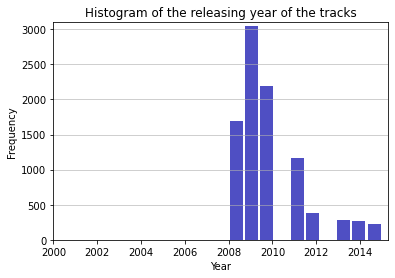

(2000.0, 2015.29225)

In [0]:
#Extract the year from the released date 
big_table_final_complete = big_table_final_complete.withColumn("year_released", year(big_table_final_complete.date_released))

#We need to convert to pandas to make beautiful plots 
years = big_table_final_complete.select("year_released").toPandas()
years.head(4)

#Plot
n, bins, patches = plt.hist(x=years["year_released"], bins=10, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of the releasing year of the tracks')
maxfreq = n.max()
plt.ylim(ymax = maxfreq + 50)
plt.xlim(xmin = 2000)

The tracks we are interested in, are pretty recent (after 2008). If we are to predict the genre of the track, it is a very usefull information. Indeed, there are no many "disco" songs in the years 2010s (except songs from Bruno Mars ?). Thus, we may experience a serious class imbalance problem. It's a bias from the data because tracks were collected after 2008. Let's check our intuition :

Out[23]:

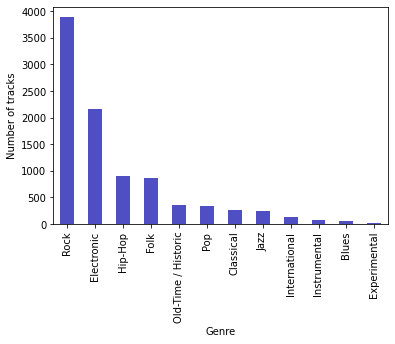

<matplotlib.axes._subplots.AxesSubplot at 0x7fd8a78f98e0>

In [0]:
#We need to convert to pandas to make beautiful plots 

genre_track = big_table_final_complete.select("genre_top").toPandas()
genre_track.head(4)

genre_track['count'] = genre_track.groupby('genre_top')['genre_top'].transform('count')
genre_track = genre_track.drop_duplicates()

genre_track.sort_values('count', ascending=False).plot.bar(x = 'genre_top',
                                                            y = 'count',
                                                            rot = 90,
                                                            color = '#0504aa',
                                                            alpha = 0.7,
                                                            xlabel = "Genre",
                                                            ylabel = "Number of tracks",
                                                            legend = False)

As expected, there are many rock and electronic songs. Surprisingly, not many pop songs ! 
May be "pop" is not very used as a top genre but as secondary genre. We need to keep this in mind.

##### Producers of the tracks

In [0]:
#We are interested in knowing if only a some producers release the majority of the tracks 
print("There are {} tracks for only {} producers".format(
  big_table_final_complete.count(), big_table_final_complete.select("producer").distinct().count()))

There are 9355 tracks for only 147 producers

In [0]:
display(big_table_final_complete.select("producer").distinct())

producer
Jakob Häglsperger / Martin Steer
Marty McSorely
Brian Turner
null
Irene Trudel
Mike Lupica
Cancelled
Terre T
"Evan ""Funk"" Davies"
Dan Bodah


Out[26]:

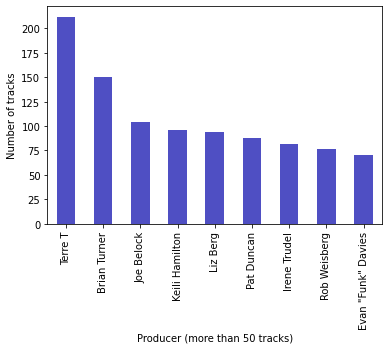

<matplotlib.axes._subplots.AxesSubplot at 0x7fd8a78242b0>

In [0]:
#We need to convert to pandas to make beautiful plots 
producer_track = big_table_final_complete.select("producer").toPandas()
producer_track.head(4)

producer_track['count'] = producer_track.groupby('producer')['producer'].transform('count')
producer_track = producer_track.drop_duplicates()

producer_track_more_than_50 = producer_track[producer_track["count"] > 50]

producer_track_more_than_50.sort_values('count', ascending=False).plot.bar(x = 'producer', 
                                                                           y = 'count',
                                                                           rot = 90,
                                                                           color = '#0504aa',
                                                                           alpha = 0.7,
                                                                           xlabel = "Producer (more than 50 tracks)",
                                                                           ylabel = "Number of tracks",
                                                                           legend = False)

Perhaps some producers are specialised in some genres ?

In [0]:
producer_genre_track = big_table_final_complete.select("producer", "genre_top").toPandas()

#We select top 4 producers 
producer_genre_track = producer_genre_track.loc[producer_genre_track['producer'].isin(["Brian Turner",
                                                                                        "Joe Belock",
                                                                                        "Keili Hamilton",
                                                                                        "Terre T"])]



crosstable_prod_genre = pd.crosstab(producer_genre_track['producer'],producer_genre_track['genre_top'])
crosstable_prod_genre

Out[27]:

genre_top,Blues,Folk,Hip-Hop,International,Pop,Rock
producer,,,,,,
Brian Turner,16,2,0,0,0,132
Joe Belock,0,0,0,0,23,81
Keili Hamilton,0,0,8,0,3,85
Terre T,0,6,0,6,0,200


Yes indeed ! We may want to take into account this categorical variable in our analyses.

##### Duration of the tracks

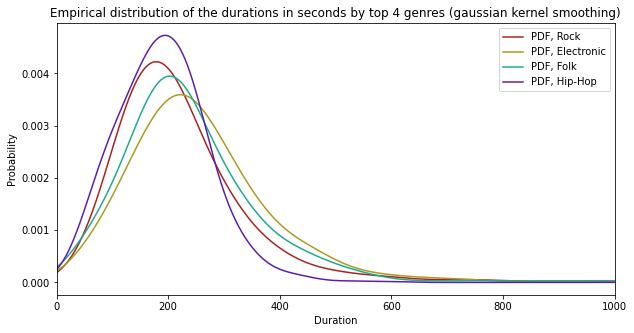

In [0]:
genre_duration_track = big_table_final_complete.select("genre_top", "duration").toPandas()
genre_duration_track['duration'] = genre_duration_track['duration'].astype(float)

df_rock = genre_duration_track[genre_duration_track["genre_top"] == "Rock"]
df_electronic = genre_duration_track[genre_duration_track["genre_top"] == "Electronic"]
df_folk = genre_duration_track[genre_duration_track["genre_top"] == "Folk"]
df_hip_hop = genre_duration_track[genre_duration_track["genre_top"] == "Hip-Hop"]

#plot
plt.figure(figsize = (10, 5))
plt.xlim(0, 1000) 
mn, mx = plt.xlim(0, 1000)
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 1000)
kde = st.gaussian_kde(df_rock['duration'].dropna())
kde2 = st.gaussian_kde(df_electronic['duration'].dropna())
kde3 = st.gaussian_kde(df_folk['duration'].dropna())
kde4 = st.gaussian_kde(df_hip_hop['duration'].dropna())


plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF, Rock",color="#AA221E")
plt.plot(kde_xs, kde2.pdf(kde_xs), label="PDF, Electronic",color="#AA9B1E")
plt.plot(kde_xs, kde3.pdf(kde_xs), label="PDF, Folk",color="#1EAA93")
plt.plot(kde_xs, kde4.pdf(kde_xs), label="PDF, Hip-Hop",color="#5E1EAA")

plt.legend(loc="upper right")
plt.ylabel('Probability')
plt.xlabel('Duration')
plt.title("Empirical distribution of the durations in seconds by top 4 genres (gaussian kernel smoothing)");

Most rock songs last less than 3 minutes. Electronic music last more than 3 minutes most of the time. It seems that this variable alone is not very important ...

## PCA on temporal features, using MLlib

Temporal features are too numerous (518 !). We need to group them in a smart way. Let's do a PCA !

In [0]:
#We create a small df for the PCA
df_for_PCA = big_table_final_complete.select([c for c in big_table_final_complete.columns if c in df_features_clean.columns])
df_for_PCA.columns

Out[29]: ['track_id',
 'feature0',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6',
 'feature7',
 'feature8',
 'feature9',
 'feature10',
 'feature11',
 'feature12',
 'feature13',
 'feature14',
 'feature15',
 'feature16',
 'feature17',
 'feature18',
 'feature19',
 'feature20',
 'feature21',
 'feature22',
 'feature23',
 'feature24',
 'feature25',
 'feature26',
 'feature27',
 'feature28',
 'feature29',
 'feature30',
 'feature31',
 'feature32',
 'feature33',
 'feature34',
 'feature35',
 'feature36',
 'feature37',
 'feature38',
 'feature39',
 'feature40',
 'feature41',
 'feature42',
 'feature43',
 'feature44',
 'feature45',
 'feature46',
 'feature47',
 'feature48',
 'feature49',
 'feature50',
 'feature51',
 'feature52',
 'feature53',
 'feature54',
 'feature55',
 'feature56',
 'feature57',
 'feature58',
 'feature59',
 'feature60',
 'feature61',
 'feature62',
 'feature63',
 'feature64',
 'feature65',
 'feature66',
 'feature67',
 'feature68',
 'feature69',
 'feature70',
 'feature71',
 'feature72',
 'feature73',
 'feature74',
 'feature75',
 'feature76',
 'feature77',
 'feature78',
 'feature79',
 'feature80',
 'feature81',
 'feature82',
 'feature83',
 'feature84',
 'feature85',
 'feature86',
 'feature87',
 'feature88',
 'feature89',
 'feature90',
 'feature91',
 'feature92',
 'feature93',
 'feature94',
 'feature95',
 'feature96',
 'feature97',
 'feature98',
 'feature99',
 'feature100',
 'feature101',
 'feature102',
 'feature103',
 'feature104',
 'feature105',
 'feature106',
 'feature107',
 'feature108',
 'feature109',
 'feature110',
 'feature111',
 'feature112',
 'feature113',
 'feature114',
 'feature115',
 'feature116',
 'feature117',
 'feature118',
 'feature119',
 'feature120',
 'feature121',
 'feature122',
 'feature123',
 'feature124',
 'feature125',
 'feature126',
 'feature127',
 'feature128',
 'feature129',
 'feature130',
 'feature131',
 'feature132',
 'feature133',
 'feature134',
 'feature135',
 'feature136',
 'feature137',
 'feature138',
 'feature139',
 'feature140',
 'feature141',
 'feature142',
 'feature143',
 'feature144',
 'feature145',
 'feature146',
 'feature147',
 'feature148',
 'feature149',
 'feature150',
 'feature151',
 'feature152',
 'feature153',
 'feature154',
 'feature155',
 'feature156',
 'feature157',
 'feature158',
 'feature159',
 'feature160',
 'feature161',
 'feature162',
 'feature163',
 'feature164',
 'feature165',
 'feature166',
 'feature167',
 'feature168',
 'feature169',
 'feature170',
 'feature171',
 'feature172',
 'feature173',
 'feature174',
 'feature175',
 'feature176',
 'feature177',
 'feature178',
 'feature179',
 'feature180',
 'feature181',
 'feature182',
 'feature183',
 'feature184',
 'feature185',
 'feature186',
 'feature187',
 'feature188',
 'feature189',
 'feature190',
 'feature191',
 'feature192',
 'feature193',
 'feature194',
 'feature195',
 'feature196',
 'feature197',
 'feature198',
 'feature199',
 'feature200',
 'feature201',
 'feature202',
 'feature203',
 'feature204',
 'feature205',
 'feature206',
 'feature207',
 'feature208',
 'feature209',
 'feature210',
 'feature211',
 'feature212',
 'feature213',
 'feature214',
 'feature215',
 'feature216',
 'feature217',
 'feature218',
 'feature219',
 'feature220',
 'feature221',
 'feature222',
 'feature223',
 'feature224',
 'feature225',
 'feature226',
 'feature227',
 'feature228',
 'feature229',
 'feature230',
 'feature231',
 'feature232',
 'feature233',
 'feature234',
 'feature235',
 'feature236',
 'feature237',
 'feature238',
 'feature239',
 'feature240',
 'feature241',
 'feature242',
 'feature243',
 'feature244',
 'feature245',
 'feature246',
 'feature247',
 'feature248',
 'feature249',
 'feature250',
 'feature251',
 'feature252',
 'feature253',
 'feature254',
 'feature255',
 'feature256',
 'feature257',
 'feature258',
 'feature259',
 'feature260',
 'feature261',
 'feature262',
 'feature263',
 'feature264',
 'feature265',
 'feature266',
 'feature267',
 'feature268',
 'feature269',
 'feature270',
 'feature271',
 'featur

In [0]:
feature_columns = df_for_PCA.columns
feature_columns.remove('track_id')

In [0]:
#We import what we need
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.linalg.distributed import RowMatrix
from pyspark.ml.feature import PCA

vector_assembler = VectorAssembler(inputCols = feature_columns, outputCol = 'features')
id_features_df = vector_assembler.transform(df_for_PCA).select(['track_id', 'features'])

In [0]:
#We standardise (an import step of the PCA)
standardizer = StandardScaler(withMean=True, withStd=True, inputCol='features', outputCol='std_features')
standardizer_model = standardizer.fit(id_features_df)
id_features_df_standardized = standardizer_model.transform(id_features_df)

In [0]:
#Next, we convert our scaled features into an MLlibRowMatrix instance. A RowMatrix is a distributed matrix with no index, where each row is a vector. We achieve this by converting our scaled features data frame into an RDD and mapping each row of the RDD to the corresponding scaled feature vector : 

#scaled_features_rows_rdd = id_features_df_standardized.select("std_features").rdd 
#scaled_features_matrix = RowMatrix(scaled_features_rows_rdd.map(lambda x: x[0].tolist()))

#Now that we have our standardized data in matrix form, we can easily compute the top k principal components by invoking the computePrincipalComponents()method exposed by MLlib's RowMatrix

number_principal_components = 20
#principal_components = scaled_features_matrix.computePrincipalComponents(number_principal_components)

In [0]:
#Alternatively, we can use MLlib's PCA() estimator directly on the dataframe containing our standardized feature vectors to generate a new dataframe with a new column containing the PCA feature vectors. Let's do this, it's more simple to retrieve the principal components afterwards ! 

In [0]:
pca = PCA(k = number_principal_components, inputCol = "std_features", outputCol = "pca_features")
pca_model = pca.fit(id_features_df_standardized)
pca_df = pca_model.transform(id_features_df_standardized)

In [0]:
pca_df_2 = pca_df.select("track_id","pca_features")

In [0]:
import pyspark.sql.functions as F
from pyspark.sql.types import ArrayType, DoubleType

def split_array_to_list(col):
    def to_list(v):
        return v.toArray().tolist()
    return F.udf(to_list, ArrayType(DoubleType()))(col)

df_pca_final = pca_df_2.select("track_id", split_array_to_list(F.col("pca_features")).alias("pca"))\
    .select(["track_id"]+[F.col("pca")[i] for i in range(20)])

display(df_pca_final)

track_id,pca[0],pca[1],pca[2],pca[3],pca[4],pca[5],pca[6],pca[7],pca[8],pca[9],pca[10],pca[11],pca[12],pca[13],pca[14],pca[15],pca[16],pca[17],pca[18],pca[19]
1677,-2.7818326493569185,3.5242637445232234,3.138668700647485,2.1019649735210657,3.792654903541062,-1.416764645718702,1.885019511571595,4.253352002850076,-2.4965221734439624,0.1123138511633025,0.26423221849591605,-0.6044889728368881,3.6507195469973586,0.7831779044758955,4.313657743417713,0.711321359563833,0.12309974506176632,-0.37319117704135485,3.178692909387538,-3.9134542938171295
1697,-3.5102285521580057,-1.7676552223525324,0.4682813856749571,-5.010311278227817,-0.33348090957206317,0.1330076020142458,4.17052468094414,1.8425836681065135,-0.12988541185050606,-2.207666547303416,-1.3793163357601295,-2.4001359263160453,3.263996089639356,-3.5875135143472354,-5.314377319734341,-1.4207539319825608,-0.15484606968194267,-0.588834609755694,2.3637156668829515,-0.530792901855756
1806,-0.287734854945497,4.901254558377852,0.46956852849188274,-3.0885705630353324,-0.22151477332136774,1.7206525949196196,-0.10811487520668871,1.7200106561376813,-1.8349045797475079,-0.28976342966675234,0.1338762462178285,0.9556060060842074,0.3729857961740585,-0.7374786276470898,0.6651037434342659,2.764569005972721,-0.7940061083352961,2.4497204365993803,0.10965580717865187,-2.3761812741766937
1950,4.344240145623891,-5.271190258510203,-4.842645028099968,-5.435309826586861,-3.3345879455798806,7.290720222877627,-7.107496878757468,7.770824938242824,-1.7167863029418187,-4.547388864223746,-0.5659487928247268,-3.2160863462586495,-0.23100097526078464,3.4087320410528275,1.2818337760212428,-1.5638641133018596,3.6781132388287254,-4.703835124886554,0.05586250410868971,-0.357942450093485
3764,-1.3152021846656987,1.8949066256593476,-3.8424535182008737,3.8371934692859044,-0.5089391771947815,-7.475605608146264,-0.45914988532178685,4.403075453014597,0.005741029424226565,-1.641186787357298,-0.018615898687749086,-0.20187698762394168,-0.8330355792752272,3.1676606580561923,-2.5693279098224706,1.240904117227696,-3.7844026465317677,-0.2205865938379415,-0.8335304972928034,-3.1247886913984497
10959,15.516754088082564,2.434770020984781,0.5813905679636409,1.2136811830430212,0.3202480808194562,0.16073270878157786,-1.564781328204486,-0.271645179448562,-0.44072994211391825,-1.9016110910623965,5.684986710859666,6.0872044589490235,-0.008368040586487623,0.0430488296524611,3.333045133526685,2.419045394649355,0.3695944232109185,-0.3483405369370152,2.77178517517265,-5.210836346088498
11938,-0.8134860437613333,0.7767101120981312,-3.2517127921777904,-5.320148314726702,-1.644880035231491,0.6486584244125618,0.0087444621830588,1.7911265579349618,-4.108638590793811,0.22504976314053557,-1.1281961960756157,-0.9620155565430584,0.36776065898292765,3.533342380126029,0.07820110749738013,1.8636138691225106,-0.7538598125445973,0.6295910360618324,1.7225981795297085,0.9993204136786372
13460,9.099706052024725,1.0886046201777146,-6.952561877666383,-2.112935141131376,-4.903822747866749,0.4495975000564668,-1.9468357272623245,2.686455840387628,5.284596584174127,-2.8157261725956086,2.259899272230275,-0.9903568667354083,2.1696306979887416,0.11559973981225086,-0.1422372293875869,-1.9637615682622624,2.7861435253524167,2.397292362920073,1.2287163891973423,-1.0985168252168094
14719,0.43551367139029795,-5.148286185020126,0.4151281286520774,-4.149247957671785,-0.8355813414474522,1.2813293621006876,0.5006013570795536,0.5282961947603921,-2.6173857993215393,2.7885126738479613,-1.3202438653010105,1.1860354958695307,-2.3736151854224268,-6.270334712615702,-2.005477564888676,1.110866167804805,3.2543429414195297,-0.17966881252928335,-2.35404058843126,-2.043501232667255
15437,5.269062826123082,3.072106507972196,-6.858756701402012,-0.1520248702794782,-1.9760175595376877,-2.259039380140101,5.393459681002756,-2.74881425366887,3.848986120182122,1.5928642276535752,-0.3753517071903082,-0.5631485737468154,2.514069162599812,-6.337265670211781,-3.203897006014831,1.7742552329263281,3.4591

## PCA n°2 with Sklearn on usual features 
It seems that acousticness, danceability, energy, instrumentalness, liveness, speechiness, tempo, valence are interesting features. We don't really want to group them. But, to have an idea of their discriminatory power, we are going to do a PCA and to have a beautiful visualisation ! This time, let's do it with Sklearn.

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [0]:
#PCA 2
L2=['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo','valence']
df_for_PCA2 = big_table_final_complete.select([c for c in big_table_final_complete.columns if c in L2])
df_for_PCA2.columns
df_for_PCA2=df_for_PCA2.toPandas()
df_for_PCA2

Out[39]:

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,0.370300,0.652203,0.464867,8.752932e-01,0.107511,0.038233,153.044,0.538378
1,0.960468,0.342534,0.515747,9.353258e-01,0.350354,0.101436,63.716,0.061155
2,0.273062,0.852707,0.924236,7.566405e-01,0.110508,0.053093,109.758,0.584491
3,0.842376,0.635357,0.300840,9.257045e-01,0.111907,0.035559,117.741,0.509768
4,0.325395,0.281429,0.350532,9.623103e-01,0.184741,0.046942,134.303,0.039635
...,...,...,...,...,...,...,...,...
9350,0.006932,0.430498,0.952312,3.974901e-02,0.390515,0.149238,103.080,0.412116
9351,0.240490,0.700013,0.583396,1.001596e-03,0.108957,0.071842,112.010,0.298337
9352,0.000195,0.188420,0.171487,6.135051e-04,0.077293,0.033421,107.843,0.039417
9353,0.057430,0.607374,0.199210,6.889000e-07,0.090923,0.089434,69.409,0.767542


In [0]:
#We only take 2 principal components as the main goal here is the visualisation ! 

x = StandardScaler().fit_transform(df_for_PCA2.values)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
PCA_1 = big_table_final_complete.select("track_id","genre_top").toPandas()
PCA_1= PCA_1[PCA_1["genre_top"].isin(["Rock","Folk","Electronic","Hip-Hop"])]

finalDf = pd.concat([principalDf, PCA_1['genre_top']], axis = 1)
finalDf=finalDf.dropna()
finalDf.head(5)

Out[40]:

,principal component 1,principal component 2,genre_top
0,0.613997,-0.260122,Electronic
1,-2.106267,0.325816,Rock
2,1.849147,-0.121873,Rock
3,-0.505656,0.781991,Rock
4,-1.456427,-1.090426,Rock


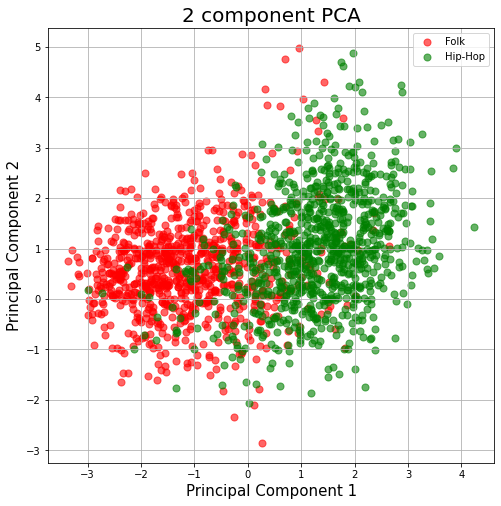

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["Folk","Hip-Hop"]
colors = ['r', 'g', "m", "y"]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['genre_top'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50,
              alpha=0.6)
ax.legend(targets)
ax.grid()

Good enough !

In [0]:
#Indeed, the explained variable is pretty high 
pca.explained_variance_ratio_

Out[42]: array([0.22857736, 0.17911848])

# Logistic regression to classify the music according to the its top genre

In [0]:
#We set up the list of explanatory variables we are interested in. We also take our dependent variable "genre_top" 

list_variables_logistic = ['genre_top',
                          'acousticness', 
                          'danceability',
                          'energy',
                          'instrumentalness',
                          'liveness',
                          'speechiness',
                          'tempo',
                          'valence', 
                          'producer',
                          'track_id']

#We build a new DataFrame called "df_for_model" with the columns specified above 
df_for_model = big_table_final_complete.select([c for c in big_table_final_complete.columns if c in list_variables_logistic])

In [0]:
#We add the 20 new variables from the first PCA 
df_for_model_pca = df_for_model.join(df_pca_final, on=['track_id'], how='left')

In [0]:
#We check that, indeed, we have the right columns 
df_for_model_pca.columns

Out[45]: ['track_id',
 'producer',
 'genre_top',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'tempo',
 'valence',
 'pca[0]',
 'pca[1]',
 'pca[2]',
 'pca[3]',
 'pca[4]',
 'pca[5]',
 'pca[6]',
 'pca[7]',
 'pca[8]',
 'pca[9]',
 'pca[10]',
 'pca[11]',
 'pca[12]',
 'pca[13]',
 'pca[14]',
 'pca[15]',
 'pca[16]',
 'pca[17]',
 'pca[18]',
 'pca[19]']

In [0]:
df_for_model_pca = df_for_model_pca.drop("track_id")

In [0]:
#We want to use the variable "producer". Yet, there are too many of them. We only select the top 4. We need to recode the variable to create a category called "Other".
#We are going to specify a function nammed "recode"
#The goal of this function is to group some modalities of categorical variables / to rename them thanks to a dict
#We import what we need : 
from itertools import chain
from pyspark.sql.functions import col, create_map, lit, when, isnull
from pyspark.sql.column import Column

def recode(col_name, map_dict, default = None):
    """
    - col_name is the name of the columns we are interested in (should be categorical) 
    - map_dict is the dictionary to rename modalities / to create new ones 
    - default is the default value of the modality 
    """
    
    if not isinstance(col_name, Column): # Allows either column name string or column instance to be passed
        col_name = col(col_name)
    mapping_expr = create_map([lit(x) for x in chain(*map_dict.items())])
    if default is None:
        return  mapping_expr.getItem(col_name)
    else:
        return when(~isnull(mapping_expr.getItem(col_name)), mapping_expr.getItem(col_name)).otherwise(default)

In [0]:
#For the producer variable, we think that is informative to only keep big producers that are "specialised" in a genre 
#All top 4 producer will keep their names. 

producer_dict = {"Brian Turner" : "Brian Turner",
                 "Joe Belock" : "Joe Belock",
                 "Keili Hamilton" : "Keili Hamilton",
                 "Terre T" : "Terre T"}
                                                                                    
#We create a new column nammed "producer_clean" where all the values of the column "producer" have been changed according to the dict 
df_for_model_pca = df_for_model_pca.withColumn("producer_clean", recode('producer', producer_dict, default='Other'))

#We don't need the producer column anymore ! 
df_for_model_pca = df_for_model_pca.drop("producer")

#Let's check and count the number of each modality 
df_for_model_pca.groupBy('producer_clean').count().show()

+--------------+-----+
producer_clean|count|
+--------------+-----+
 Brian Turner| 150|
 Other| 8793|
 Terre T| 212|
 Joe Belock| 104|
Keili Hamilton| 96|
+--------------+-----+

In [0]:
#In this notebook, we don't want to predict all the genres (some of them are not very numerous and it might affect the performance a lot)
#We focus on the 4 biggest genres : 'Rock','Electronic', 'Folk', 'Hip-Hop'

df_for_model_2 = df_for_model_pca.where(col('genre_top').isin(['Rock','Electronic', "Folk", "Hip-Hop"]))

#Check 
df_for_model_2.groupBy('genre_top').count().show()

#Check the columns 
print(df_for_model_2.columns)

+----------+-----+
 genre_top|count|
+----------+-----+
 Rock| 3892|
 Folk| 874|
Electronic| 2170|
 Hip-Hop| 910|
+----------+-----+

['genre_top', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'pca[0]', 'pca[1]', 'pca[2]', 'pca[3]', 'pca[4]', 'pca[5]', 'pca[6]', 'pca[7]', 'pca[8]', 'pca[9]', 'pca[10]', 'pca[11]', 'pca[12]', 'pca[13]', 'pca[14]', 'pca[15]', 'pca[16]', 'pca[17]', 'pca[18]', 'pca[19]', 'producer_clean']

In [0]:
#We want to correctly handle numeric variable, categorical variables and the dependent variable
#The process includes Category Indexing, One-Hot Encoding and VectorAssembler — a feature transformer that merges multiple columns into a vector column.

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer

#Categorical variables 
categoricalColumns = ['producer_clean']

stages = []

for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

#Dependent variable 
label_stringIdx = StringIndexer(inputCol = 'genre_top', outputCol = 'label')
stages += [label_stringIdx]

#Numeric variable 
numericCols = df_for_model_2.select(['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence','pca[0]','pca[1]','pca[2]','pca[3]','pca[4]','pca[5]','pca[6]','pca[7]','pca[8]','pca[9]','pca[10]','pca[11]','pca[12]','pca[13]','pca[14]','pca[15]','pca[16]','pca[17]','pca[18]','pca[19]']).columns
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [0]:
#We use a Pipeline 
from pyspark.ml import Pipeline

pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df_for_model_2)
df_for_model_2 = pipelineModel.transform(df_for_model_2)
selectedCols = df_for_model_2.columns
df_for_model_2 = df_for_model_2.select(selectedCols)
df_for_model_2.printSchema()

root
-- genre_top: string (nullable = true)
-- acousticness: double (nullable = true)
-- danceability: double (nullable = true)
-- energy: double (nullable = true)
-- instrumentalness: double (nullable = true)
-- liveness: double (nullable = true)
-- speechiness: double (nullable = true)
-- tempo: double (nullable = true)
-- valence: double (nullable = true)
-- pca[0]: double (nullable = true)
-- pca[1]: double (nullable = true)
-- pca[2]: double (nullable = true)
-- pca[3]: double (nullable = true)
-- pca[4]: double (nullable = true)
-- pca[5]: double (nullable = true)
-- pca[6]: double (nullable = true)
-- pca[7]: double (nullable = true)
-- pca[8]: double (nullable = true)
-- pca[9]: double (nullable = true)
-- pca[10]: double (nullable = true)
-- pca[11]: double (nullable = true)
-- pca[12]: double (nullable = true)
-- pca[13]: double (nullable = true)
-- pca[14]: double (nullable = true)
-- pca[15]: double (nullable = true)
-- pca[16]: double (nullable = true)
-- pca[17]: double (nullable = true)
-- pca[18]: double (nullable = true)
-- pca[19]: double (nullable = true)
-- producer_clean: string (nullable = true)
-- producer_cleanIndex: double (nullable = false)
-- producer_cleanclassVec: vector (nullable = true)
-- label: double (nullable = false)
-- features: vector (nullable = true)

In [0]:
#We split into train/test (70% - 30%)

train, test = df_for_model_2.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 5477
Test Dataset Count: 2369

In [0]:
#Check how the labels are in the train set 
train.groupBy('label').count().show()

+-----+-----+
label|count|
+-----+-----+
 0.0| 2711|
 1.0| 1523|
 3.0| 604|
 2.0| 639|
+-----+-----+

In [0]:
#Time for the logistic regression 
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)

lrModel = lr.fit(train)

trainingSummary = lrModel.summary

In [0]:
# For multiclass, we can inspect metrics on a per-label basis
print("False positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("True positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("Precision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i, prec))

print("Recall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i, rec))

print("F-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))

accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

False positive rate by label:
label 0: 0.2017353579175705
label 1: 0.09635811836115327
label 2: 0.030177759404712692
label 3: 0.036733018674327926
True positive rate by label:
label 0: 0.8579859830320915
label 1: 0.7498358502954695
label 2: 0.6118935837245696
label 3: 0.5860927152317881
Precision by label:
label 0: 0.8065187239944521
label 1: 0.7498358502954695
label 2: 0.7281191806331471
label 3: 0.6641651031894934
Recall by label:
label 0: 0.8579859830320915
label 1: 0.7498358502954695
label 2: 0.6118935837245696
label 3: 0.5860927152317881
F-measure by label:
label 0: 0.8314566577301162
label 1: 0.7498358502954695
label 2: 0.6649659863945577
label 3: 0.6226912928759895
Accuracy: 0.7692167244842066
FPR: 0.13422097884197107
TPR: 0.7692167244842066
F-measure: 0.7663132746594057
Precision: 0.7659112907613648
Recall: 0.7692167244842066

The model is ok on the train set (at least, we have learned something !) ... Of course, the test set is the most important.

In [0]:
#Let's see what we have for the test set 
predictions = lrModel.transform(test)
predictions.select('label', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+--------------------+----------+--------------------+
label| rawPrediction|prediction| probability|
+-----+--------------------+----------+--------------------+
 1.0|[1.38828618660182...| 1.0|[0.25414857294920...|
 1.0|[0.89477407259477...| 0.0|[0.46986514465332...|
 3.0|[0.99134385930281...| 3.0|[0.32012063611492...|
 3.0|[1.28810052088455...| 3.0|[0.36377808142970...|
 2.0|[-0.8276682839892...| 1.0|[0.03029445031935...|
 2.0|[-1.4937442833690...| 2.0|[0.01759329996727...|
 0.0|[2.18585519059151...| 0.0|[0.77634224271859...|
 0.0|[1.99935043143526...| 0.0|[0.81680051740495...|
 0.0|[1.54952821408367...| 0.0|[0.64537538046092...|
 0.0|[4.75467184330093...| 0.0|[0.99328157395970...|
+-----+--------------------+----------+--------------------+
only showing top 10 rows

In [0]:
#Convert to a pandas df to easily use sklearn functions 
predictions_pandas = predictions.select('label', 'prediction').toPandas() 

In [0]:
#Performance on the test set 
from sklearn.metrics import classification_report

target_names = ['Rock','Electronic', "Folk", "Hip-Hop"]
print(classification_report(predictions_pandas["label"], predictions_pandas["prediction"], target_names=target_names))

# Decision tree classifier to classify the music according to the its top genre 

Can we do better with a tree ?

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier

#Fit the tree
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)

In [0]:
#Predict on test 
predictions_tree = dtModel.transform(test)

#Convert to a pandas df to easily use sklearn functions 
predictions_pandas_tree = predictions_tree.select('label', 'prediction').toPandas() 
print(classification_report(predictions_pandas_tree["label"], predictions_pandas_tree["prediction"], target_names=target_names))

The logictic regression seems to perform better, what if we tune the hyperparameter ?

### Decision tree classifier, tuning the max depth hyperparameter

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [2, 4, 6, 8])
             .build())

cv = CrossValidator(estimator= dt, estimatorParamMaps = paramGrid, evaluator=MulticlassClassificationEvaluator(), numFolds = 5)
# Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
cvModel = cv.fit(train)

In [0]:
prediction_tree_optim = cvModel.transform(test)
predictions_pandas_tree_optim = prediction_tree_optim.select('label', 'prediction').toPandas() 
print(classification_report(predictions_pandas_tree_optim["label"], predictions_pandas_tree_optim["prediction"], target_names=target_names))

# Random forest classifier

This one is a bit long to run on the default cluster proposed by Databricks. Please comment the cell if you don't want this to be executed.

In [0]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')

paramGrid_rf = (ParamGridBuilder()
             .addGrid(rf.maxDepth, [2, 4, 6])
             .addGrid(rf.numTrees, [10, 50, 100, 200])
             .build())

cv_rf = CrossValidator(estimator = rf,
                       estimatorParamMaps = paramGrid_rf,
                       evaluator = MulticlassClassificationEvaluator(),
                       numFolds=5)

cvModel_rf = cv_rf.fit(train)

In [0]:
prediction_rf = cvModel_rf.transform(test)
predictions_pandas_prediction_rf = prediction_rf.select('label', 'prediction').toPandas() 
print(classification_report(predictions_pandas_prediction_rf["label"], predictions_pandas_prediction_rf["prediction"], target_names=target_names))

# Model valence as a bonus

Valence is a psychological notion of appreciation or disappreciation of an object or an experience. It is often used in music. Here, we have valence for every track in the data, and want to see if it can be linked with other variables (physical or subjective) and ideally model it.

In [0]:
stages = []
#Dependent variable 
target_num = VectorAssembler(inputCols= ['valence'], outputCol = 'target')
stages += [target_num]

#Numeric variables 
numericCols = df_for_model_2.select(['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo','pca[0]','pca[1]','pca[2]','pca[3]','pca[4]','pca[5]','pca[6]','pca[7]','pca[8]','pca[9]','pca[10]','pca[11]','pca[12]','pca[13]','pca[14]','pca[15]','pca[16]','pca[17]','pca[18]','pca[19]']).columns
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features_2")
stages += [assembler]

In [0]:
#pipeline creation
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df_for_model_2)
df_for_model_3 = pipelineModel.transform(df_for_model_2)
selectedCols = df_for_model_3.columns
df_for_model_3 = df_for_model_3.select(selectedCols)
df_for_model_3.printSchema()

In [0]:
#Again, we split into train/test (70% - 30%)

train, test = df_for_model_3.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

In [0]:
#more imports
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
#create regressor
rf = RandomForestRegressor(featuresCol="features_2")
rf.fit(train)

In [0]:
#set up fitting
modelEvaluator=RegressionEvaluator()

paramGrid_rf = (ParamGridBuilder()
             .addGrid(rf.maxDepth, [2, 4, 6])
             .addGrid(rf.numTrees, [10, 5, 40])
             .build())

In [0]:
#cross_val fitting
cv_rf = CrossValidator(estimator = rf,
                       evaluator = modelEvaluator,
                       estimatorParamMaps = paramGrid_rf,
                       numFolds = 3)

cvModel_rf = cv_rf.fit(train)

In [0]:
#evaluation on test
prediction_rf = cvModel_rf.transform(test)
modelEvaluator.evaluate(prediction_rf)

In [0]:
#another evaluation, on train
trainingSummary = cvModel_rf.bestModel.stages[-1].summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)